In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
data = pd.read_csv('data.csv')
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

Number of rows with Heart Disease = 0: 410
Number of rows with Heart Disease = 1: 508


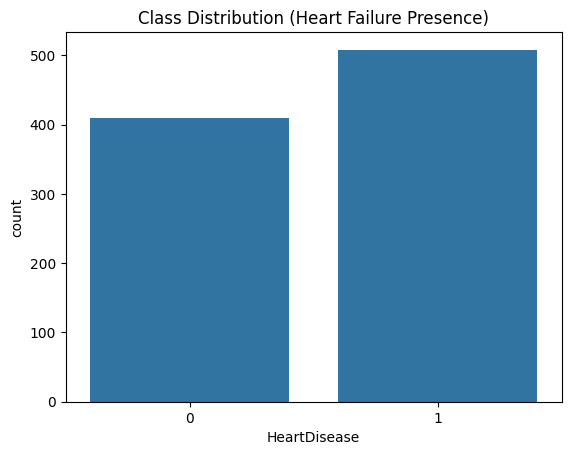

In [4]:
# Count the number of rows for each class
class_counts = data['HeartDisease'].value_counts()
print("Number of rows with Heart Disease = 0:", class_counts[0])
print("Number of rows with Heart Disease = 1:", class_counts[1])
# Visualize class distribution
sns.countplot(x=data['HeartDisease'])
plt.title('Class Distribution (Heart Failure Presence)')
plt.show()


In [5]:
# Handle Non_numeric data encoding
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})  # Encode 'Sex' as 1 for Male, 0 for Female
data['ChestPainType'] = data['ChestPainType'].map({'ATA': 1, 'NAP': 0, 'ASY': 2, 'TA': 3})  # Encode 'ChestPainType'
data['RestingECG'] = data['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})  # Encode 'RestingECG'
data['ExerciseAngina'] = data['ExerciseAngina'].map({'N': 0, 'Y': 1})  # Encode 'ExerciseAngina'
data['ST_Slope'] = data['ST_Slope'].map({'Up': 1, 'Flat': 0, 'Down': 2})  # Encode 'ST_Slope'
data_cleaned = data.loc[:, data.nunique() > 1]
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)
numeric_data = data_encoded.select_dtypes(include=['number'])
print(data.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           0   
1   49    0              0        160          180          0           0   
2   37    1              1        130          283          0           1   
3   48    0              2        138          214          0           0   
4   54    1              0        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         1             0  
1    156               0      1.0         0             1  
2     98               0      0.0         1             0  
3    108               1      1.5         0             1  
4    122               0      0.0         1             0  


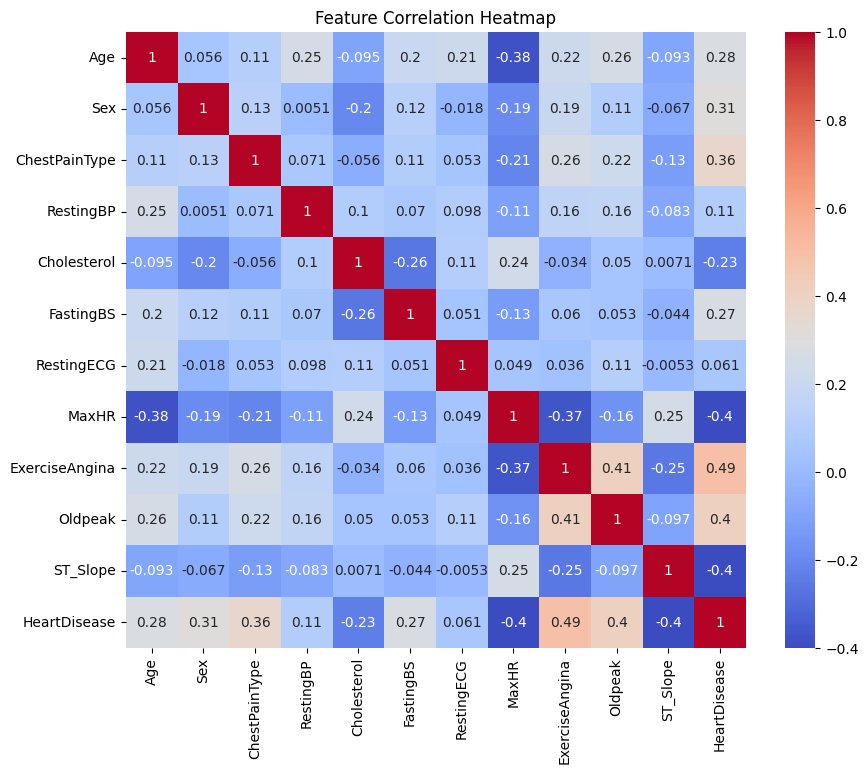

In [6]:
# Calculate the correlation matrix
corr_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

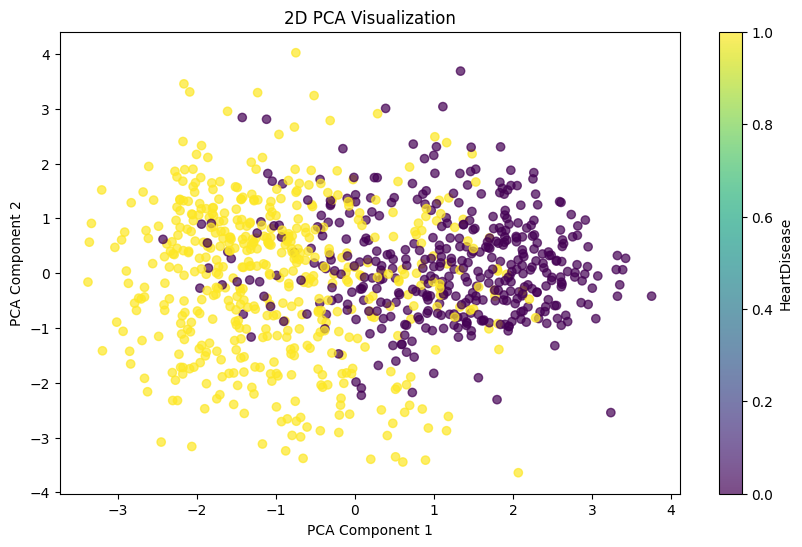

In [7]:
####ppppccccaaaaa
# Standardize the data
features = data.drop(columns=['HeartDisease'])  # Replace 'target' with your dataset's target variable 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['HeartDisease'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Visualization")
plt.colorbar(label='HeartDisease')
plt.show()

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handle missing values (drop rows with any missing values)
#data = data.dropna()
# Fill missing values (using mean)
# Fill missing values in  columns with their mean
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [9]:
"""
# Calculate Q1, Q3, and IQR for each numeric column
for col in numeric_columns:
    # Calculate the first (Q1) and third (Q3) quartiles
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Print the number of outliers detected in this column
    print(f"Outliers in column '{col}': {len(outliers)}")
    
    # Optionally, remove outliers
    # data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

print(f"Dataset size after handling outliers: {len(data)}")"""

# Assuming 'data' is your DataFrame and 'numeric_columns' contains the numeric columns you're interested in

# Calculate Z-scores for the numeric columns
z_scores = np.abs(zscore(data[numeric_columns]))

# Define the threshold for outlier detection (common threshold is 3)
threshold = 3

# Identify the rows where the Z-scores are greater than the threshold (outliers)
outliers = data[(z_scores > threshold).any(axis=1)]

# Show the outliers before removal
print("Outliers in the dataset:")
print(outliers)

Outliers in the dataset:
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
76    32    1              2        118          529          0           0   
109   39    1              1        190          241          0           0   
149   54    1              2        130          603          1           0   
166   50    1              2        140          231          0           1   
241   54    1              2        200          198          0           0   
324   46    1              2        100            0          1           1   
365   64    0              2        200            0          0           0   
390   51    1              2        140            0          0           0   
399   61    1              0        200            0          1           1   
449   55    1              0          0            0          0           0   
592   61    1              2        190          287          1           2   
616   67    0              

In [10]:
# Clean the dataset by removing the outliers
data_cleaned = data[(z_scores < threshold).all(axis=1)]

# Show the number of rows that will be deleted due to outliers
print(f"\nOriginal dataset size: {len(data)}")
print(f"Dataset size after removing outliers: {len(data_cleaned)}")
print(f"Number of rows removed: {len(data) - len(data_cleaned)}")

# Use cleaned data after Z-score filtering
data = data_cleaned


Original dataset size: 918
Dataset size after removing outliers: 899
Number of rows removed: 19


In [11]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [12]:
print(len(data))

899


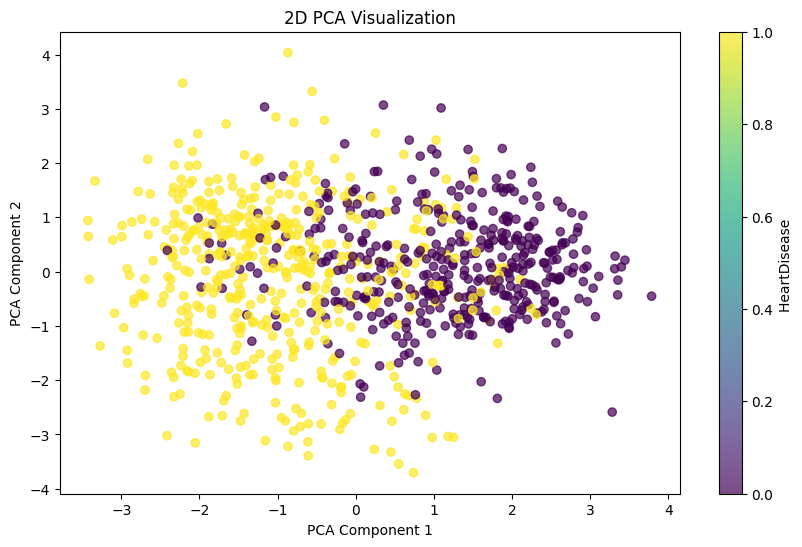

In [13]:
####ppppccccaaaaa
# Standardize the data
features = data.drop(columns=['HeartDisease'])  
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['HeartDisease'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Visualization")
plt.colorbar(label='HeartDisease ')
plt.show()

In [14]:
# Splitting the dataset into training, validation, and test sets
X = features
y = data['HeartDisease']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=20)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)

In [15]:
# Features standardization before training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

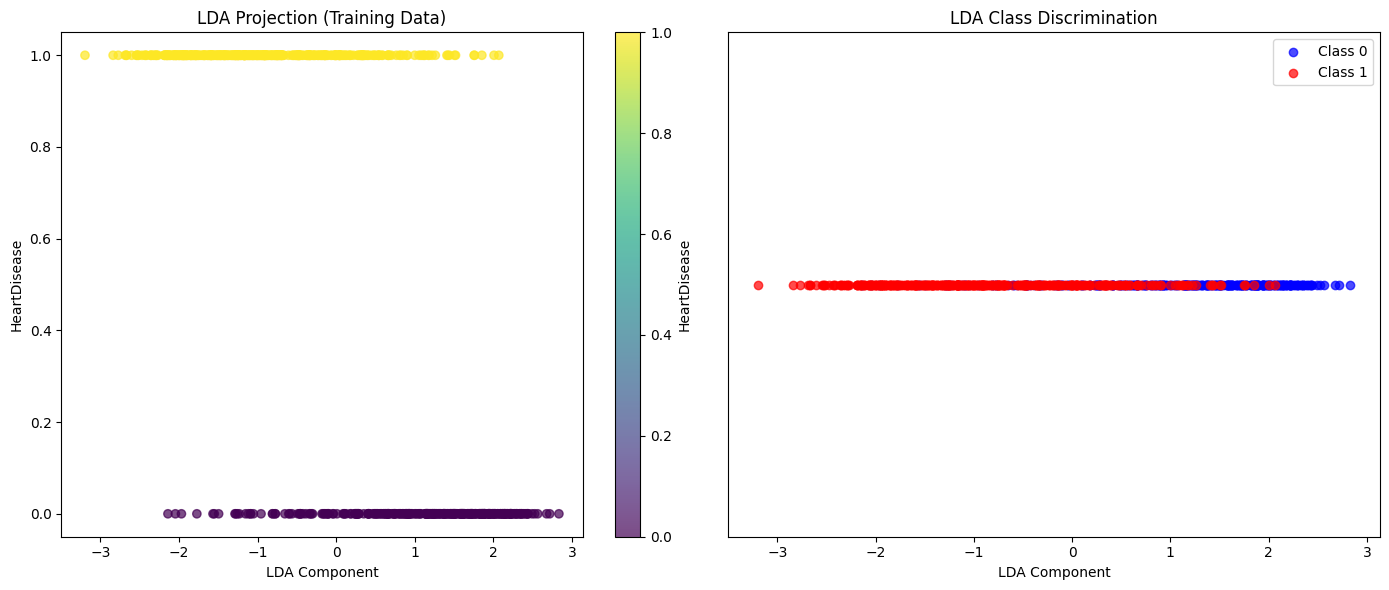

In [16]:
# Apply LDA for dimensionality reduction
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

plt.figure(figsize=(14, 6))

# Subplot 1: LDA Projection vs HeartDisease
plt.subplot(1, 2, 1)
plt.scatter(X_train_lda[:, 0], y_train, c=y_train, cmap='viridis', alpha=0.7)
plt.title('LDA Projection (Training Data)')
plt.xlabel('LDA Component')
plt.ylabel('HeartDisease')
plt.colorbar(label='HeartDisease')

# Subplot 2: LDA Class Discrimination
plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[y_train == 0], np.zeros_like(X_train_lda[y_train == 0]), 
            color='blue', label='Class 0', alpha=0.7)
plt.scatter(X_train_lda[y_train == 1], np.zeros_like(X_train_lda[y_train == 1]), 
            color='red', label='Class 1', alpha=0.7)
plt.title('LDA Class Discrimination')
plt.xlabel('LDA Component')
plt.yticks([])  # Hide y-axis as it's not meaningful for 1D projection
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Train the Naive Bayes model (before tuning)
print("=== Naïve Bayes ===")
nb_model = GaussianNB(var_smoothing=1e-9)  # Try adjusting var_smoothing (smaller values)
nb_model.fit(X_train_scaled, y_train)

# Validate the Naïve Bayes model
y_pred_nb_val = nb_model.predict(X_val_scaled)
print("Naïve Bayes Validation Accuracy:", "{:.2f}".format(accuracy_score(y_val, y_pred_nb_val)))
print("Naïve Bayes Validation Performance:")
print(confusion_matrix(y_val, y_pred_nb_val))
print(classification_report(y_val, y_pred_nb_val)) 

=== Naïve Bayes ===
Naïve Bayes Validation Accuracy: 0.88
Naïve Bayes Validation Performance:
[[39  8]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        47
           1       0.83      0.93      0.88        43

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



In [18]:
# Evaluate Naïve Bayes on test data (before tuning)
y_pred_nb_test = nb_model.predict(X_test_scaled)
print("Naïve Bayes Test Accuracy:", "{:.2f}".format(accuracy_score(y_test, y_pred_nb_test)))
print("Naïve Bayes Test Performance:")
print(confusion_matrix(y_test, y_pred_nb_test))
print(classification_report(y_test, y_pred_nb_test))

Naïve Bayes Test Accuracy: 0.97
Naïve Bayes Test Performance:
[[39  2]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.96      0.98      0.97        49

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [19]:
# Train the SVM model (before tuning)
print("\n=== Support Vector Machine (SVM) ===")
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Validate the SVM model
y_pred_svm_val = svm_model.predict(X_val_scaled)
print("SVM Validation Accuracy:", "{:.2f}".format(accuracy_score(y_val, y_pred_svm_val)))
print("SVM Validation Performance:")
print(confusion_matrix(y_val, y_pred_svm_val))
print(classification_report(y_val, y_pred_svm_val))


=== Support Vector Machine (SVM) ===
SVM Validation Accuracy: 0.83
SVM Validation Performance:
[[33 14]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.97      0.70      0.81        47
           1       0.75      0.98      0.85        43

    accuracy                           0.83        90
   macro avg       0.86      0.84      0.83        90
weighted avg       0.87      0.83      0.83        90



In [20]:
# Evaluate SVM on test data (before tuning)
y_pred_svm_test = svm_model.predict(X_test_scaled)
print("SVM Test Accuracy: ", "{:.2f}".format(accuracy_score(y_test, y_pred_svm_test)) )
print("SVM Test Performance:")
print(confusion_matrix(y_test, y_pred_svm_test))
print(classification_report(y_test, y_pred_svm_test))

SVM Test Accuracy:  0.94
SVM Test Performance:
[[37  4]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.92      0.98      0.95        49

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90



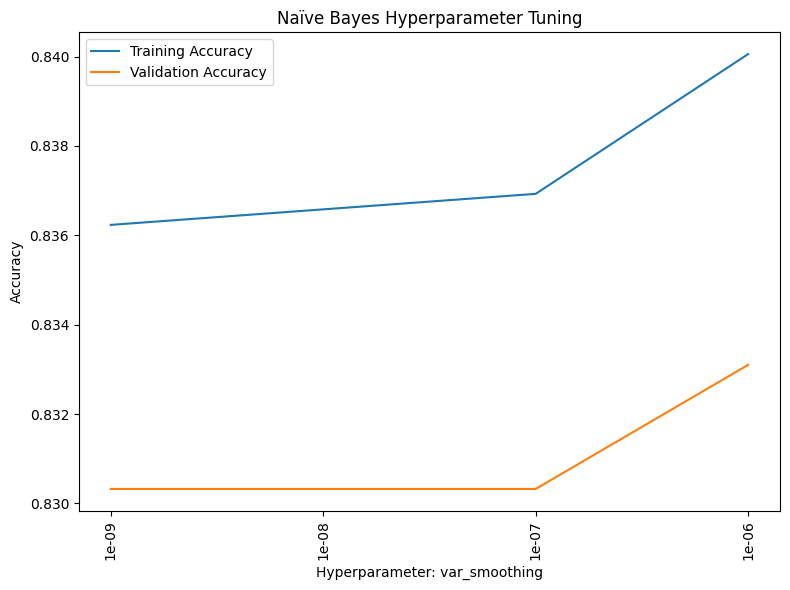

Best parameters for Naïve Bayes: {'var_smoothing': 1e-06}
Validation Metrics for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        47
           1       0.82      0.93      0.87        43

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



In [21]:
results = {}

# Naïve Bayes with hyperparameter tuning
param_grid_nb = {'var_smoothing': np.logspace(-9, -6, num=4)}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy', return_train_score=True)
grid_nb.fit(X_train, y_train)

# Extract the hyperparameter values for Naïve Bayes
param_combinations_nb = [str(params['var_smoothing']) for params in grid_nb.cv_results_['params']]

# Plot training and validation accuracy for Naïve Bayes with hyperparameter values on x-axis
plt.figure(figsize=(8, 6))
plt.plot(grid_nb.cv_results_['mean_train_score'], label='Training Accuracy')
plt.plot(grid_nb.cv_results_['mean_test_score'], label='Validation Accuracy')
plt.xticks(ticks=np.arange(len(param_combinations_nb)), labels=param_combinations_nb, rotation=90)
plt.xlabel('Hyperparameter: var_smoothing')
plt.ylabel('Accuracy')
plt.title('Naïve Bayes Hyperparameter Tuning')
plt.legend()
plt.tight_layout()  # To prevent label overlap
plt.show()

print("Best parameters for Naïve Bayes:", grid_nb.best_params_)
y_pred_val_nb = grid_nb.predict(X_val)
print("Validation Metrics for Naïve Bayes:")
print(classification_report(y_val, y_pred_val_nb))
results['Naïve Bayes'] = grid_nb.best_estimator_


===============Testing Naïve Bayes:============
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.96      0.98      0.97        49

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



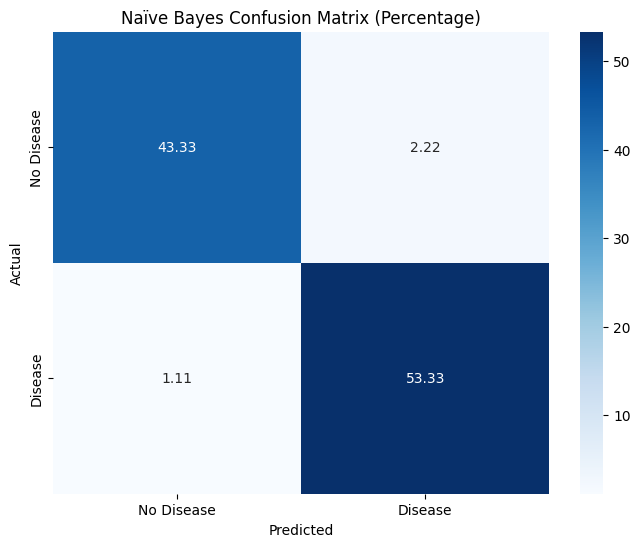

In [22]:
# Testing Naïve Bayes Model
print("\n===============Testing Naïve Bayes:============")
y_pred_test_nb = results['Naïve Bayes'].predict(X_test)
print(classification_report(y_test, y_pred_test_nb))

# Compute the confusion matrix for Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_test_nb)

# Normalize the confusion matrix to percentages
cm_percentage_nb = cm_nb.astype('float') / cm_nb.sum() * 100

# Plot the confusion matrix as percentages for Naïve Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage_nb, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Naïve Bayes Confusion Matrix (Percentage)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

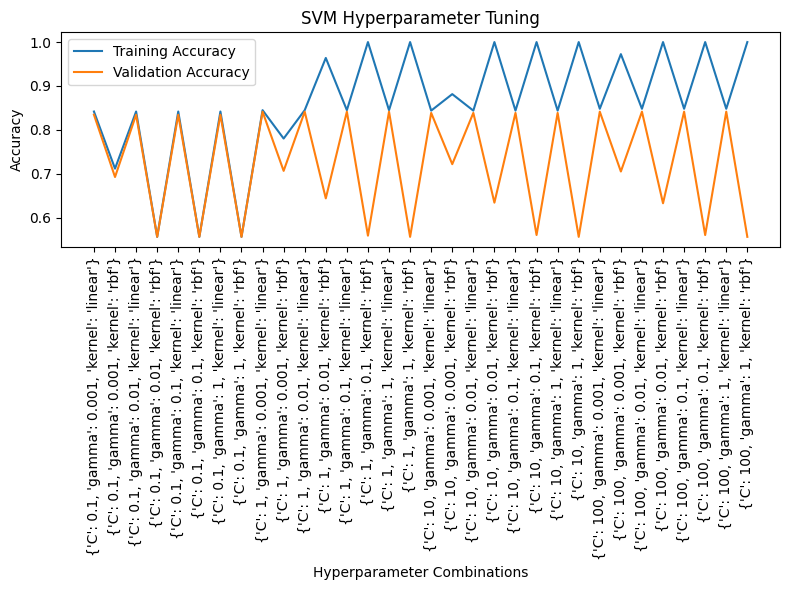

Best parameters for SVM: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Validation Metrics for SVM:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        47
           1       0.78      0.91      0.84        43

    accuracy                           0.83        90
   macro avg       0.84      0.84      0.83        90
weighted avg       0.84      0.83      0.83        90



In [23]:
# SVM with hyperparameter tuning
svc = SVC()
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', return_train_score=True)
grid_svc.fit(X_train, y_train)

# Extract hyperparameter combinations for SVM
param_combinations_svc = [str(params) for params in grid_svc.cv_results_['params']]

# Plot training and validation accuracy for SVM with hyperparameter combinations on the x-axis
plt.figure(figsize=(8, 6))
plt.plot(grid_svc.cv_results_['mean_train_score'], label='Training Accuracy')
plt.plot(grid_svc.cv_results_['mean_test_score'], label='Validation Accuracy')
plt.xticks(ticks=np.arange(len(param_combinations_svc)), labels=param_combinations_svc, rotation=90)
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Accuracy')
plt.title('SVM Hyperparameter Tuning')
plt.legend()
plt.tight_layout()  # To prevent label overlap
plt.show()

print("Best parameters for SVM:", grid_svc.best_params_)
y_pred_val_svc = grid_svc.predict(X_val)
print("Validation Metrics for SVM:")
print(classification_report(y_val, y_pred_val_svc))
results['SVM'] = grid_svc.best_estimator_


===============Testing SVM:============
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.94      0.96      0.95        49

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90



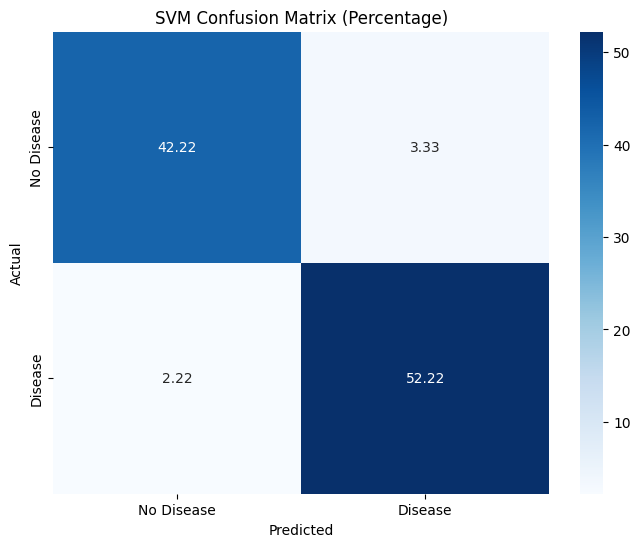

In [24]:
# Testing SVM Model
print("\n===============Testing SVM:============")
y_pred_test_svm = results['SVM'].predict(X_test)
print(classification_report(y_test, y_pred_test_svm))

# Compute the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_test_svm)

# Normalize the confusion matrix to percentages
cm_percentage_svm = cm_svm.astype('float') / cm_svm.sum() * 100

# Plot the confusion matrix as percentages for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage_svm, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('SVM Confusion Matrix (Percentage)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

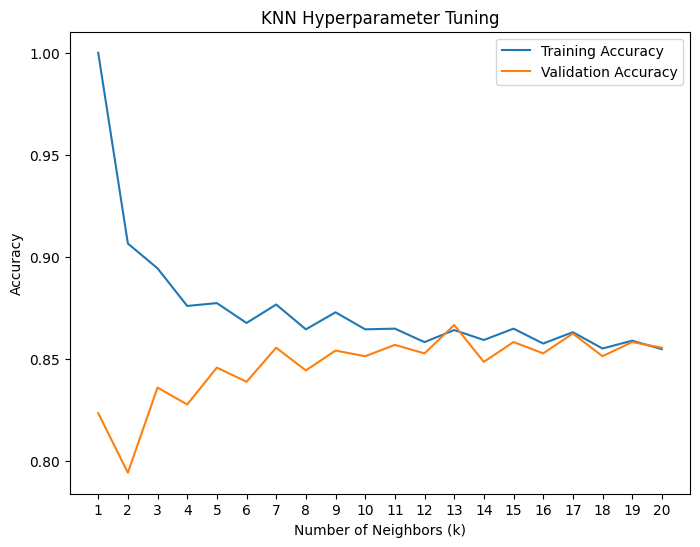

Best parameters for KNN: {'n_neighbors': 13}
Validation Metrics for KNN:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        47
           1       0.82      0.93      0.87        43

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



In [27]:
# Step 3: Training KNN Classifier 
results = {}

# KNN
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', return_train_score=True)
grid_knn.fit(X_train_scaled, y_train)

# Plot training and validation accuracy for KNN
plt.figure(figsize=(8, 6))
plt.plot(param_grid_knn['n_neighbors'], grid_knn.cv_results_['mean_train_score'], label='Training Accuracy')
plt.plot(param_grid_knn['n_neighbors'], grid_knn.cv_results_['mean_test_score'], label='Validation Accuracy')
plt.xticks(param_grid_knn['n_neighbors'])  # Make x-axis components
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.legend()
plt.show()

print("Best parameters for KNN:", grid_knn.best_params_)
y_pred_val_knn = grid_knn.predict(X_val_scaled)
print("Validation Metrics for KNN:")
print(classification_report(y_val, y_pred_val_knn))
results['KNN'] = grid_knn.best_estimator_


Testing KNN:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.96      0.98      0.97        49

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



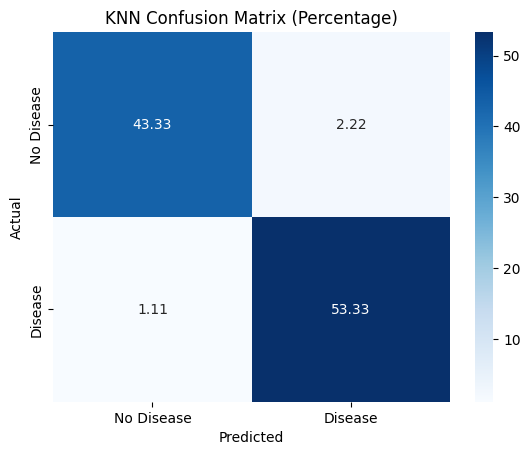

KNN Test Accuracy: 0.97


In [28]:
# Testing KNN Model
print("\nTesting KNN:")
y_pred_test_knn = results['KNN'].predict(X_test_scaled)
print(classification_report(y_test, y_pred_test_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_test_knn)  # Standard confusion matrix
total_samples_knn = np.sum(cm_knn)  # Total samples in the test set

# Convert confusion matrix to overall percentages
cm_percentage_knn = np.round((cm_knn / total_samples_knn) * 100, 2)

# Plot the confusion matrix as percentages
sns.heatmap(cm_percentage_knn, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('KNN Confusion Matrix (Percentage)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print Accuracy Score
acc_knn = accuracy_score(y_test, y_pred_test_knn)
print(f"KNN Test Accuracy: {acc_knn:.2f}")

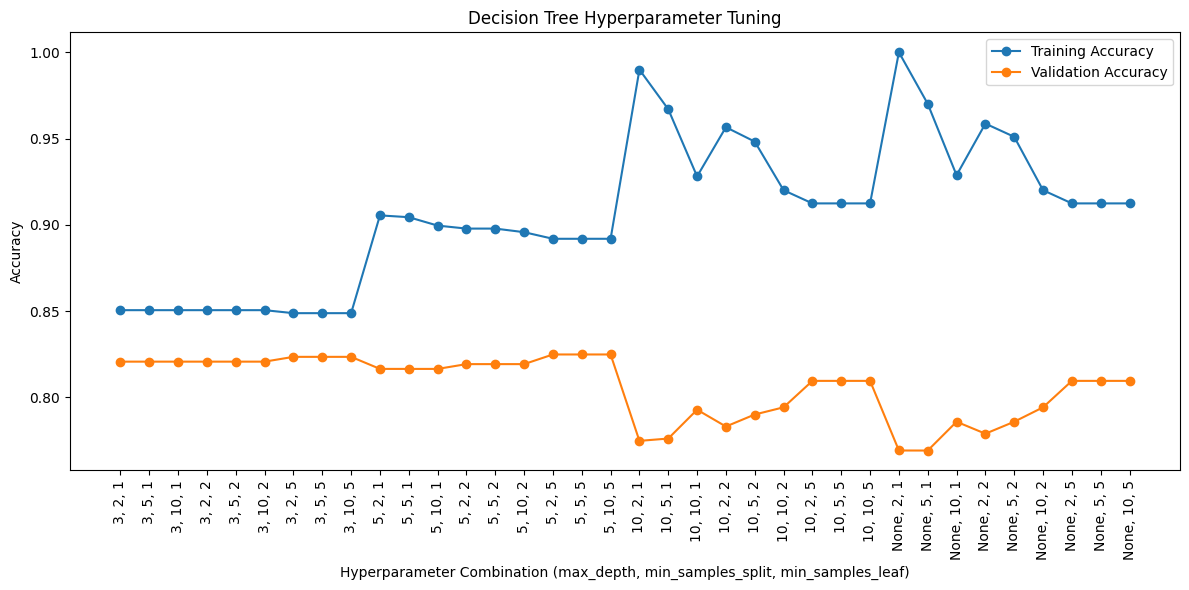

Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Validation Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        47
           1       0.76      0.91      0.83        43

    accuracy                           0.82        90
   macro avg       0.83      0.83      0.82        90
weighted avg       0.83      0.82      0.82        90



In [29]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [3, 5, 10, None],  # Includes None
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', return_train_score=True)
grid_dt.fit(X_train_scaled, y_train)

# Extract hyperparameter combinations
param_combinations = grid_dt.cv_results_['params']
param_labels = [f"{p['max_depth']}, {p['min_samples_split']}, {p['min_samples_leaf']}" for p in param_combinations]

# Training and validation accuracies
mean_train_scores = grid_dt.cv_results_['mean_train_score']
mean_test_scores = grid_dt.cv_results_['mean_test_score']

# Plot training and validation accuracy for Decision Tree
plt.figure(figsize=(12, 6))
plt.plot(param_labels, mean_train_scores, label='Training Accuracy', marker='o')
plt.plot(param_labels, mean_test_scores, label='Validation Accuracy', marker='o')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Hyperparameter Combination (max_depth, min_samples_split, min_samples_leaf)')
plt.ylabel('Accuracy')
plt.title('Decision Tree Hyperparameter Tuning')
plt.legend()
plt.tight_layout()
plt.show()

print("Best parameters for Decision Tree:", grid_dt.best_params_)
y_pred_val_dt = grid_dt.predict(X_val_scaled)
print("Validation Metrics for Decision Tree:")
print(classification_report(y_val, y_pred_val_dt))
results['Decision Tree'] = grid_dt.best_estimator_


Testing Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        41
           1       0.85      0.94      0.89        49

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90



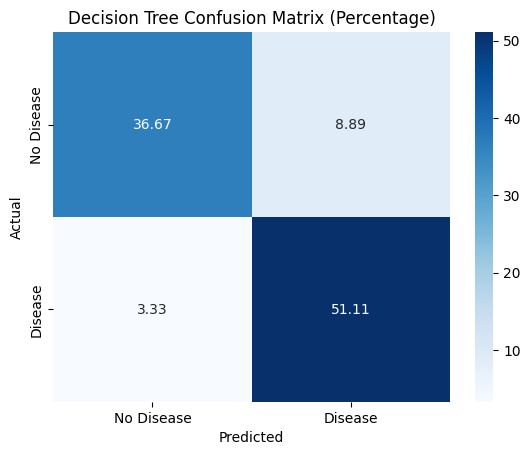

Decision Tree Test Accuracy: 0.88


In [30]:
# Testing Decision Tree Model
print("\nTesting Decision Tree:")
y_pred_test_dt = results['Decision Tree'].predict(X_test_scaled)
print(classification_report(y_test, y_pred_test_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_test_dt)  # Standard confusion matrix
total_samples_dt = np.sum(cm_dt)  # Total samples in the test set

# Convert confusion matrix to overall percentages
cm_percentage_dt = np.round((cm_dt / total_samples_dt) * 100, 2)

# Plot the confusion matrix as percentages
sns.heatmap(cm_percentage_dt, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Decision Tree Confusion Matrix (Percentage)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print Accuracy Score
acc_dt = accuracy_score(y_test, y_pred_test_dt)
print(f"Decision Tree Test Accuracy: {acc_dt:.2f}")

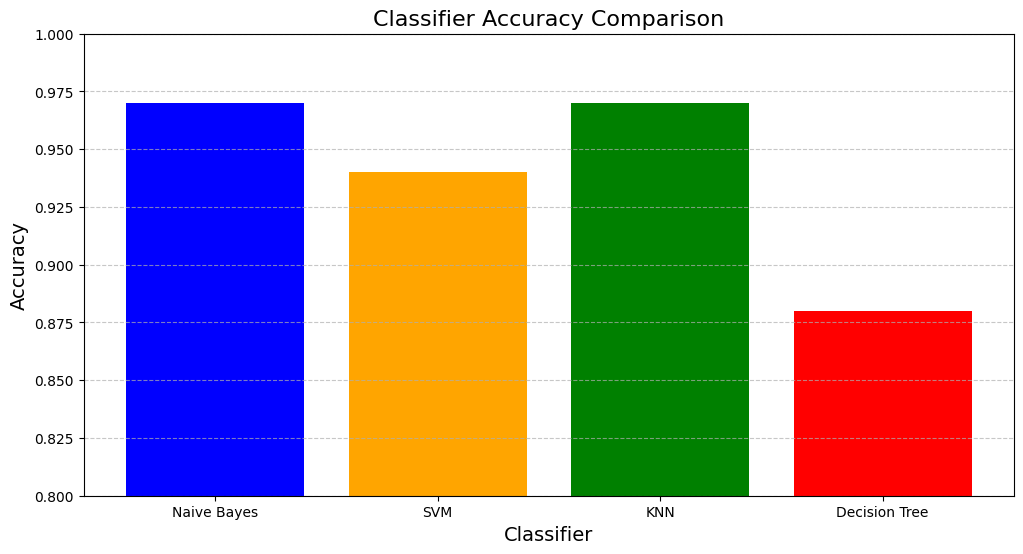

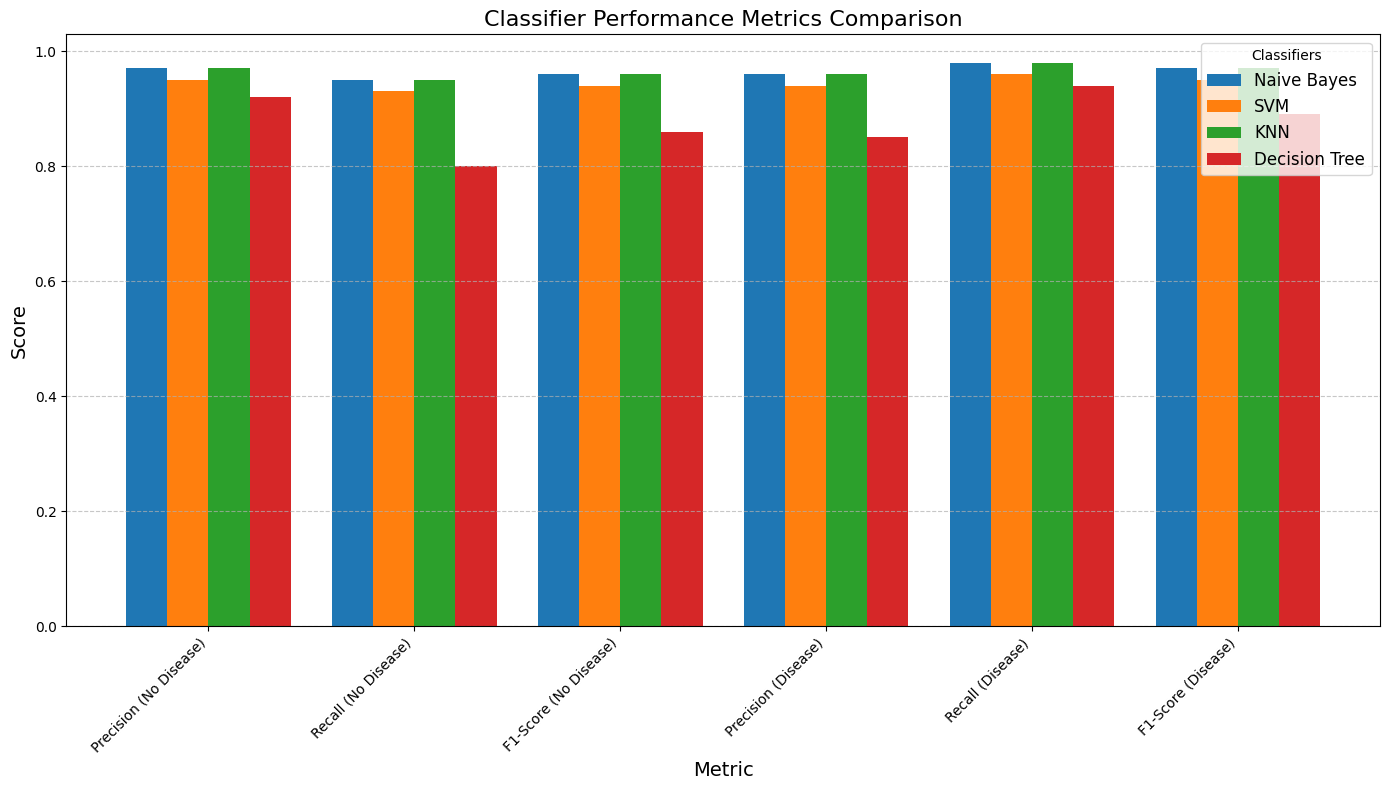

In [97]:
# Comparison between Classifiers
classifiers = ['Naive Bayes', 'SVM', 'KNN', 'Decision Tree']
accuracy = [0.97, 0.94, 0.97, 0.88]

metrics = {
    'Naive Bayes': [0.97, 0.95, 0.96, 0.96, 0.98, 0.97],
    'SVM': [0.95, 0.93, 0.94, 0.94, 0.96, 0.95],
    'KNN': [0.97, 0.95, 0.96, 0.96, 0.98, 0.97],
    'Decision Tree': [0.92, 0.80, 0.86, 0.85, 0.94, 0.89]
}

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
plt.bar(classifiers, accuracy, color=['blue', 'orange', 'green', 'red'])
plt.title('Classifier Accuracy Comparison', fontsize=16)
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

metrics_labels = ['Precision (No Disease)', 'Recall (No Disease)', 'F1-Score (No Disease)',
                  'Precision (Disease)', 'Recall (Disease)', 'F1-Score (Disease)']
x = np.arange(len(metrics_labels))  # label locations
width = 0.2  

fig, ax = plt.subplots(figsize=(14, 8))
for i, (clf, values) in enumerate(metrics.items()):
    ax.bar(x + i * width, values, width, label=clf)

ax.set_xlabel('Metric', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Classifier Performance Metrics Comparison', fontsize=16)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metrics_labels, rotation=45, ha='right')
ax.legend(title='Classifiers', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

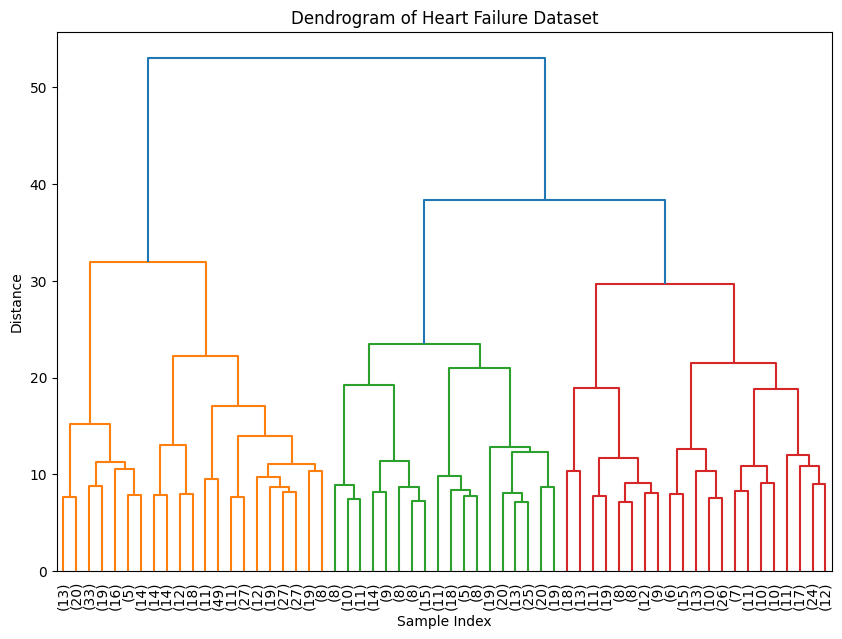

In [59]:
#Dendrogram
linked = linkage(features_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=60, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram of Heart Failure Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


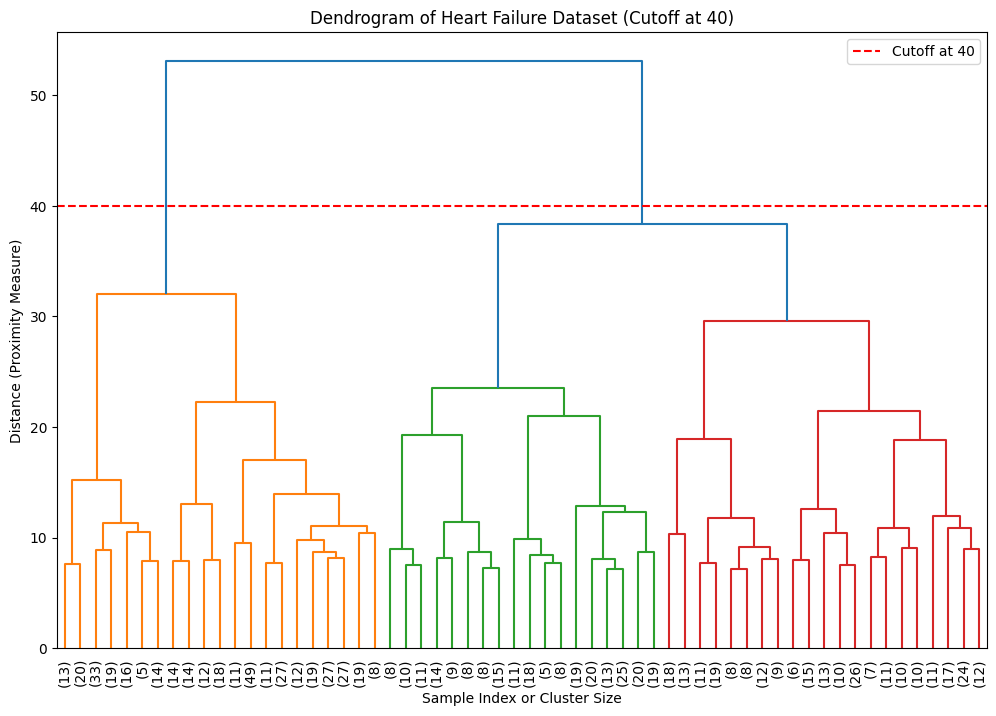

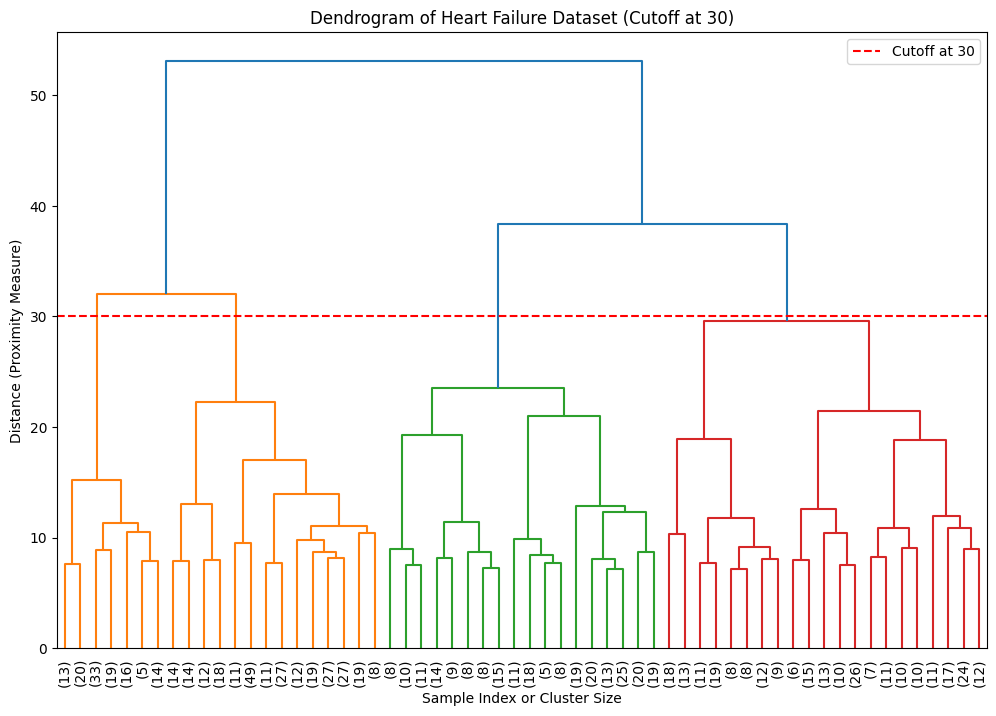

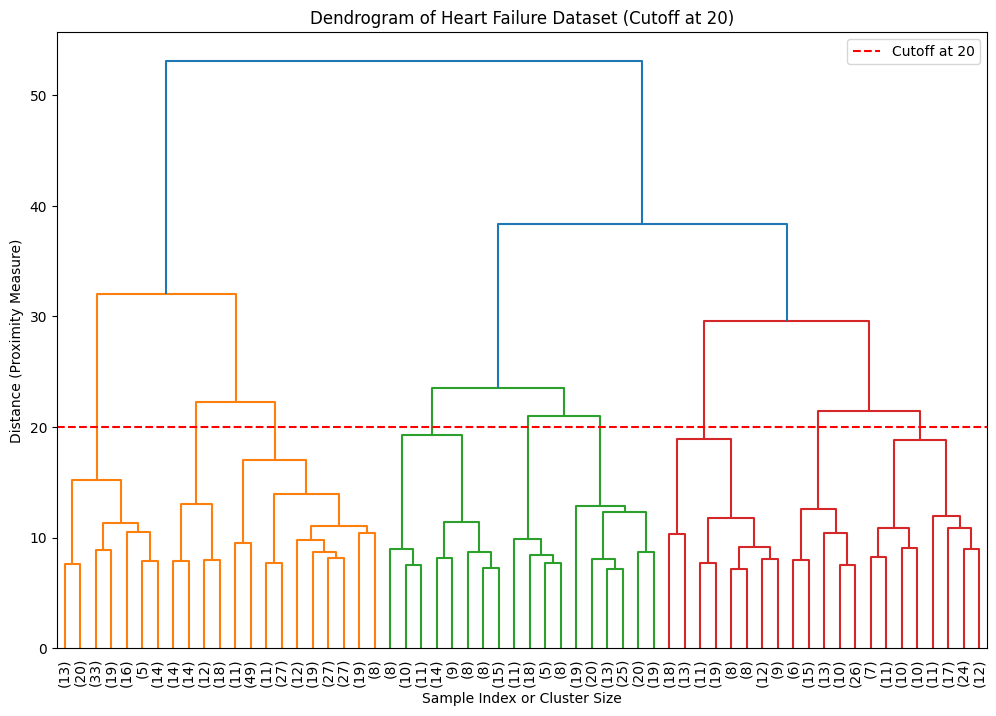

In [101]:
# Displaying the clustering structure of the data at different cut-off thresholds

linked = linkage(features_scaled, method='ward')

# Define the cut-off distances
cutoff_distances = [40, 30, 20]

# Generate and plot dendrograms for each cut-off distance
for cutoff_distance in cutoff_distances:
    plt.figure(figsize=(12, 8))
    dendrogram(
        linked,
        truncate_mode='lastp',  
        p=60,  
        leaf_rotation=90.,  
        leaf_font_size=10., 
        color_threshold=0.7 * max(linked[:, 2])  
    )
    
    plt.title(f'Dendrogram of Heart Failure Dataset (Cutoff at {cutoff_distance})')
    plt.xlabel('Sample Index or Cluster Size')
    plt.ylabel('Distance (Proximity Measure)')
    
    # horizontal line to indicate cluster cutoff
    plt.axhline(y=cutoff_distance, color='r', linestyle='--', label=f'Cutoff at {cutoff_distance}')
    plt.legend()
    

    plt.show()
